Notebook using

MobileNet SSD v2 (COCO)

Detects the location of 90 types objects
Dataset: COCO
Input size: 300x300

In [1]:
# import the necessary packages
from edgetpu.detection.engine import DetectionEngine
from PIL import Image
from PIL import ImageDraw
import numpy as np
import io
%matplotlib inline

from IPython.display import display # to display images

In [2]:
MODEL = "/home/robin/edgetpu/all_models/mobilenet_ssd_v2_coco_quant_postprocess_edgetpu.tflite"
LABEL_FILE = "/home/robin/edgetpu/all_models/coco_labels.txt"  

In [3]:
# Function to read labels from text files.
def ReadLabelFile(file_path):
  with open(file_path, 'r', encoding="utf-8") as f:
    lines = f.readlines()
  ret = {}
  for line in lines:
    pair = line.strip().split(maxsplit=1)
    ret[int(pair[0])] = pair[1].strip()
  return ret

In [4]:
labels =  ReadLabelFile(LABEL_FILE)

In [5]:
len(labels)

80

In [6]:
# Run inference.
engine = DetectionEngine(MODEL)

In [7]:
engine.model_path()

'/home/robin/edgetpu/all_models/mobilenet_ssd_v2_coco_quant_postprocess_edgetpu.tflite'

In [8]:
engine.get_input_tensor_shape()

array([  1, 300, 300,   3], dtype=int32)

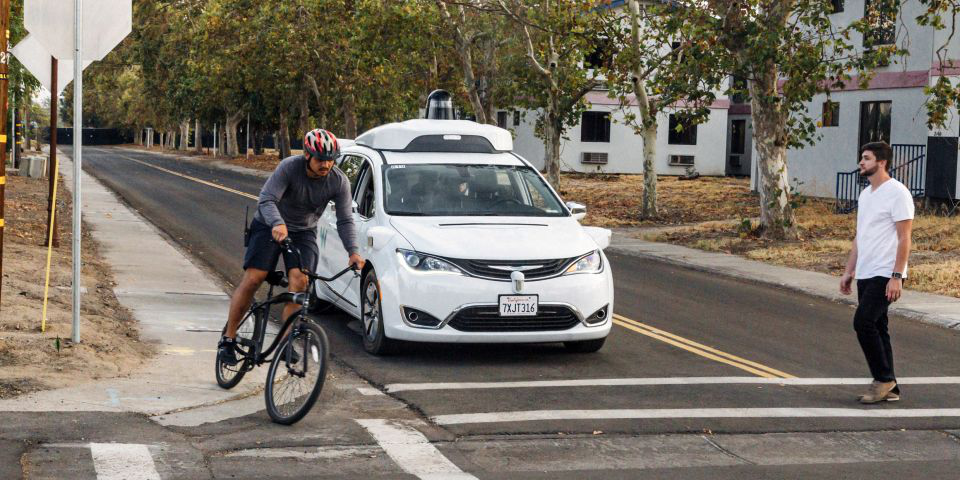

In [9]:
# image_file = "face.jpg" # Returns boxes around random parts of the image
image_file = "people_car.jpg" # returns zero predictions
image = Image.open(image_file)  # PIL img object.
display(image)

In [10]:
image.size

(960, 480)

[DetectWithImage](https://coral.withgoogle.com/docs/reference/edgetpu.detection.engine/#edgetpu.detection.engine.DetectionEngine.DetectWithImage) is resizing the image as required, first arg is a PIL image

In [11]:
%%time
predictions = engine.DetectWithImage(image, threshold=0.05,keep_aspect_ratio=True,relative_coord=False,top_k=10)

CPU times: user 4.7 ms, sys: 8.02 ms, total: 12.7 ms
Wall time: 26.7 ms


Prediction returns a list of detection candidate objects -> https://coral.withgoogle.com/docs/reference/edgetpu.detection.engine/

In [12]:
predictions

In [13]:
predictions[0].label_id

0

In [14]:
predictions[0].score

0.953125

In [15]:
predictions[0].bounding_box

array([[838.28767776, 135.01444817],
       [918.52632523, 407.59171486]])

In [16]:
engine.get_inference_time()

9.878000259399414

## Draw bounging boxes

In [17]:
draw = ImageDraw.Draw(image)

In [18]:
for obj in predictions:
    print ('label = ', labels[obj.label_id], ', score = ', obj.score)
    box = obj.bounding_box.flatten().tolist()
    draw.rectangle(box, outline='red')

label =  person , score =  0.953125
label =  car , score =  0.91015625
label =  person , score =  0.58203125
label =  bicycle , score =  0.26953125
label =  person , score =  0.2109375
label =  person , score =  0.2109375
label =  person , score =  0.2109375
label =  traffic light , score =  0.2109375
label =  bicycle , score =  0.16015625
label =  person , score =  0.16015625


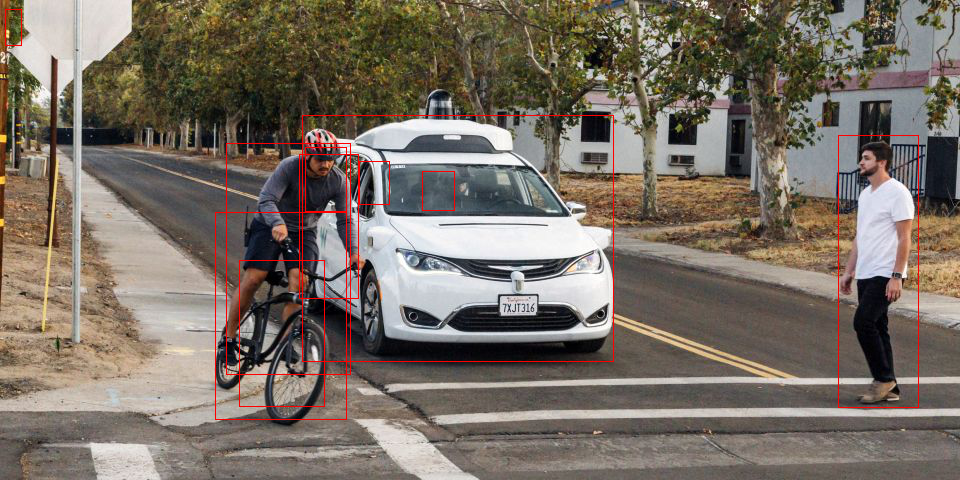

In [19]:
display(image)